In [1]:
%matplotlib inline

In [2]:
import pickle

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

from tools.feature_format import featureFormat, targetFeatureSplit

In [3]:
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    

dictionary = pickle.load(open("tools/final_project_dataset_modified.pkl", "rb") )

In [4]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat(dictionary, features_list,
                     remove_any_zeroes=True,
                     sort_keys=False)
target, features = targetFeatureSplit(data)


### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, target,
                                                                          test_size=0.5, random_state=42)

In [5]:
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)
print("Slope: ", reg.coef_[0], "\nIntercept: ", reg.intercept_)
print("Socre Training: ", reg.score(feature_train, target_train))
print("Socre Training: ", reg.score(feature_test, target_test))

Slope:  0.278682235644 
Intercept:  1000259.2563
Socre Training:  0.000344041570394
Socre Training:  0.0176187767126


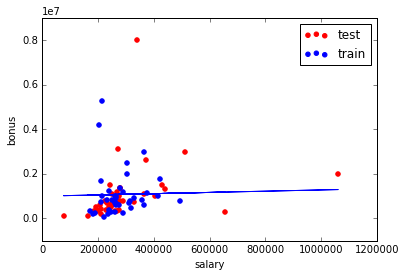

In [6]:
train_color = "b"
test_color = "r"

### draw the scatterplot, with color-coded training and testing points
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color) 
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()